In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.csv
/kaggle/input/titanic/titanic.txt


In [94]:
import numpy as np
titanics = np.genfromtxt('../input/titanic/titanic.txt',delimiter='\t',missing_values = None,dtype=str)

In [95]:
a = "Male"
b = "Yes"
if a == 'Male' and b == 'Yes':
    print("Male")
else:
    print("Yes")

Male


In [96]:
a = np.array([1,0,0])
b = np.array([1,0,1])
if np.where(a == 1) and np.where(b == 0):
    print("Yes")
else:
    print("No")

Yes


In [97]:
a == 1

array([ True, False, False])

In [98]:
(a == 0) & (b == 0)

array([False,  True, False])

เอาไปใช้ในการเช็ค 2 กรณี ให้ใช้ & (bit operator) แทน and เช่น 
* ชาย - รอด 
*     ชาย - ไม่รอด
*     ญ - รอด
*     ญ - ไม่รอด

and จะเอาไว้หาความจริงเพียงหนึ่งเดียว

In [99]:
a = np.hstack( (np.array(['M','M','F']).reshape(3,1) , np.array(['Y','Y','N']).reshape(3,1)) )
a

array([['M', 'Y'],
       ['M', 'Y'],
       ['F', 'N']], dtype='<U1')

In [100]:
a[:,1] == 'Y'

array([ True,  True, False])

# Data Visualization

In [101]:
import matplotlib.pyplot as plt

In [102]:
titanics = np.genfromtxt('../input/titanic/titanic.txt',delimiter='\t',missing_values = None,dtype=str)


(array([1210.,   62.,   37.]),
 array([0., 2., 4., 6.]),
 <BarContainer object of 3 artists>)

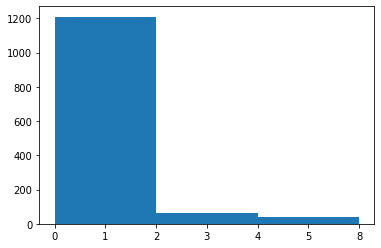

In [103]:
plt.hist(titanics[1:,4], bins=3)

In [104]:
relative = np.array([float(item) for item in titanics[1:,4]])
relative

array([0., 1., 1., ..., 0., 0., 0.])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2d07d0d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2d07d8650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2d07d09d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2d07d8f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2d07e2390>],
 'means': []}

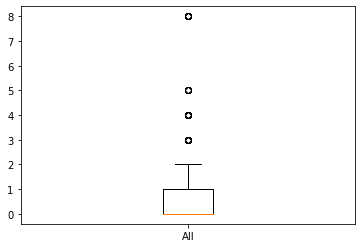

In [105]:
plt.boxplot(relative, labels = ['All'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2d27ad250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2d27adad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2d27a3f90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa2d27ba3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2d27ba810>,
 'means': []}

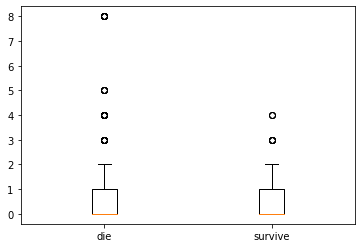

In [106]:
survive = titanics[1:,-1]
plt.boxplot([relative[survive=='No'], relative[survive=='Yes'] ], labels = ['die','survive'])

# Folium Library

In [107]:
import folium
world_map = folium.Map()
world_map

In [108]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15)
cmu_map


ละติจูด ลองจิจูด ระดับซูมที่ 15

In [109]:
cmu_map = folium.Map(location = [18.7971238,98.9537993], zoom_start =15, tiles='Stamen Terrain')
cmu_map

ดูความสูงต่ำของแมพ

In [110]:
folium.TileLayer('OpenStreetMap').add_to(cmu_map)
cmu_map

ดูว่าตรงไหนแห้งแล้ง ตรงไหนเป็นน้ำ

In [111]:
!pip install geocoder
import geocoder

In [112]:
location = 'น้ำตกแม่สา'
loc = geocoder.osm(location)
loc.json

{'accuracy': 0.75,
 'address': 'น้ำตกแม่สา, แม่แรม, จังหวัดเชียงใหม่, 50180, ประเทศไทย',
 'bbox': {'northeast': [18.9066127, 98.8967386],
  'southwest': [18.9065127, 98.8966386]},
 'confidence': 10,
 'country': 'ประเทศไทย',
 'country_code': 'th',
 'importance': 0.75,
 'lat': 18.9065627,
 'lng': 98.8966886,
 'ok': True,
 'osm_id': 1638690882,
 'osm_type': 'node',
 'place_id': 16442596,
 'place_rank': 20,
 'postal': '50180',
 'quality': 'waterfall',
 'raw': {'place_id': 16442596,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 1638690882,
  'boundingbox': ['18.9065127', '18.9066127', '98.8966386', '98.8967386'],
  'lat': '18.9065627',
  'lon': '98.8966886',
  'display_name': 'น้ำตกแม่สา, แม่แรม, จังหวัดเชียงใหม่, 50180, ประเทศไทย',
  'place_rank': 20,
  'category': 'waterway',
  'type': 'waterfall',
  'importance': 0.75,
  'address': {'waterway': 'น้ำตกแม่สา',
   'town': 'แม่แรม',
   'state': 'จังหวัดเชียงใหม่',
   

เอสไว้เสิชสถานที่

In [113]:
from folium import Map, Marker, GeoJson, LayerControl
latlng = [loc.lat, loc.lng]
maesa_map = Map(location=latlng, zoom_start=15)
maesa_map.add_child(Marker(location=latlng, popup="This is waterfall", icon = folium.Icon(color = 'blue', icon = 'home'), tooltip = "Click for more"))
maesa_map

ให้มันมาร์คโลเคชั่นที่น้ำตกแม่สา 
add child ให้ตั้งมาร์คเกอร์

In [114]:
loc = geocoder.osm('สวนสัตว์เชียงใหม่')
folium.CircleMarker(
  location = [loc.lat, loc.lng],
  radius = 50,
  color = 'red',
  fill = True,
  fill_color = 'red'
).add_to(cmu_map)
cmu_map

# Pandas

In [115]:
import pandas as pd

In [116]:
df = pd.read_csv('../input/titanic/titanic.txt', sep='\t', header = 0)
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No


Header = none มันจะไม่มีหัว

In [117]:
df.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'Life Boat', 'Survived'],
      dtype='object')

In [118]:
df.values

array([['First', 'Allen, Miss. Elisabeth Walton', 'Female', ...,
        'Southampton', '2', 'Yes'],
       ['First', 'Allison, Master. Hudson Trevor', 'Male', ...,
        'Southampton', '11', 'Yes'],
       ['First', 'Allison, Miss. Helen Loraine', 'Female', ...,
        'Southampton', nan, 'No'],
       ...,
       ['Third', 'Zakarian, Mr. Mapriededer', 'Male', ..., 'Cherbourg',
        nan, 'No'],
       ['Third', 'Zakarian, Mr. Ortin', 'Male', ..., 'Cherbourg', nan,
        'No'],
       ['Third', 'Zimmerman, Mr. Leo', 'Male', ..., 'Southampton', nan,
        'No']], dtype=object)

In [119]:
df['Name']

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: Name, Length: 1309, dtype: object

In [120]:
df.iloc[2,0:5]

Passenger Class                                              First
Name                                  Allison, Miss. Helen Loraine
Sex                                                         Female
Age                                                            2.0
No of Siblings or Spouses on Board                               1
Name: 2, dtype: object

index location >>> access ข้อมูลในลักษณะ numpy

In [121]:
df.iloc[:,3]

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: Age, Length: 1309, dtype: float64

ข้อมูลทั้งหมดในคอลัมน์ 3

In [122]:
df.loc[2,'Passenger Class':'Age']

Passenger Class                           First
Name               Allison, Miss. Helen Loraine
Sex                                      Female
Age                                         2.0
Name: 2, dtype: object

แถว 2 ข้อมูลคอลัมน์ คลาสกับอายุ

In [123]:
df.loc[:,'Passenger Class':'Age']

,Passenger Class,Name,Sex,Age
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000
1,First,"Allison, Master. Hudson Trevor",Male,0.9167
2,First,"Allison, Miss. Helen Loraine",Female,2.0000
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000
...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000
1305,Third,"Zabour, Miss. Thamine",Female,NaN
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000


In [124]:
df.dtypes

Passenger Class                        object
Name                                   object
Sex                                    object
Age                                   float64
No of Siblings or Spouses on Board      int64
No of Parents or Children on Board      int64
Ticket Number                          object
Passenger Fare                        float64
Cabin                                  object
Port of Embarkation                    object
Life Boat                              object
Survived                               object
dtype: object

In [125]:
df['Age'].max()

80.0

In [126]:
max(df['Age'])

80.0

In [127]:
df['Age'].min()

0.1667

In [128]:
df[df['Age'] == df['Age'].min()]

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
763,Third,"Dean, Miss. Elizabeth Gladys 'Millvina'",Female,0.1667,1,2,C.A. 2315,20.575,NaN,Southampton,10,Yes


ดูที่ตำแหน่งอายุ โดยที่อายุน้อยที่สุด

In [129]:
df['Name'][df['Age'] == df['Age'].max()]

14    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object

ต้องการชื่อ ของคนที่อายุมากที่สุด

In [130]:
df.shape

(1309, 12)

In [131]:
df['Sex']

0       Female
1         Male
2       Female
3         Male
4       Female
         ...  
1304    Female
1305    Female
1306      Male
1307      Male
1308      Male
Name: Sex, Length: 1309, dtype: object

พวกนี้เรียก Data type แบบ Series คล้าย numpy array 

In [ ]:
df['Sex'].tolist()
#เปลี่ยนเป็นลิสต์ .tolist 
#เปลี่ยนเป็น numpy array >> .values

In [133]:
df['Label'] = df['Age'] >= 20
df

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes,True
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes,False
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",Female,14.5000,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1305,Third,"Zabour, Miss. Thamine",Female,NaN,1,0,2665,14.4542,NaN,Cherbourg,NaN,No,False
1306,Third,"Zakarian, Mr. Mapriededer",Male,26.5000,0,0,2656,7.2250,NaN,Cherbourg,NaN,No,True
1307,Third,"Zakarian, Mr. Ortin",Male,27.0000,0,0,2670,7.2250,NaN,Cherbourg,NaN,No,True


เพิ่มคอลัมน์ Label บอกว่าใครอายุมากกว่า 20 

# Check Missing Values

In [134]:
df.isnull()
#เช็คว่าตัวไหนเป็นค่าว่างบ้าง

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,True,False,False
1305,False,False,False,True,False,False,False,False,True,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,True,False,False


In [135]:
df.isnull().any()
# .any บอกว่าคอลัมน์ไหนมีค่าว่างปนอยู่บ้าง

Passenger Class                       False
Name                                  False
Sex                                   False
Age                                    True
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Ticket Number                         False
Passenger Fare                         True
Cabin                                  True
Port of Embarkation                    True
Life Boat                              True
Survived                              False
Label                                 False
dtype: bool

In [136]:
df['Age'].isnull().sum()
#ดูว่ามีค่าว่างในคอลัมน์อายุกี่ข้อมูล

263

In [137]:
df['Cabin'].isnull().sum()

1014

# Remove values

In [138]:
df_clean = df # เอา df ไปใส่ใน df_clean กันพลาด
df_clean = df_clean.drop('Cabin',1) # 1 = columns , 0 = rows
df_clean = df_clean.drop('Ticket Number',1)
df_clean.columns

Index(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare',
       'Port of Embarkation', 'Life Boat', 'Survived', 'Label'],
      dtype='object')

In [139]:
df_clean = df_clean.dropna(1,'any')
df_clean.columns
#เอาคอลัมน์ที่เป็นค่าว่างออก

Index(['Passenger Class', 'Name', 'Sex', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived', 'Label'],
      dtype='object')

In [140]:
df_clean = df_clean.dropna(0,'any')
#ดรอปแถวที่ว่าง

In [141]:
df_clean.isnull().any()

Passenger Class                       False
Name                                  False
Sex                                   False
No of Siblings or Spouses on Board    False
No of Parents or Children on Board    False
Survived                              False
Label                                 False
dtype: bool

# Replace Values

In [142]:
df_clean['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [143]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,First,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,First,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",F,1,0,No,False
1305,Third,"Zabour, Miss. Thamine",F,1,0,No,False
1306,Third,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,Third,"Zakarian, Mr. Ortin",M,0,0,No,True


# Replace string values to unique integers

In [144]:
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,First,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,First,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,First,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,First,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,Third,"Zabour, Miss. Hileni",F,1,0,No,False
1305,Third,"Zabour, Miss. Thamine",F,1,0,No,False
1306,Third,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,Third,"Zakarian, Mr. Ortin",M,0,0,No,True


In [145]:
p_class, levels = pd.factorize(df_clean['Passenger Class'])

In [146]:
p_class

array([0, 0, 0, ..., 2, 2, 2])

In [147]:
levels
#บอกว่า 0 = first , 1 = second, 2 = third

Index(['First', 'Second', 'Third'], dtype='object')

In [148]:
df_clean['Passenger Class'] = p_class+1
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,1,"Allen, Miss. Elisabeth Walton",F,0,0,Yes,True
1,1,"Allison, Master. Hudson Trevor",M,1,2,Yes,False
2,1,"Allison, Miss. Helen Loraine",F,1,2,No,False
3,1,"Allison, Mr. Hudson Joshua Creighton",M,1,2,No,True
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,1,2,No,True
...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",F,1,0,No,False
1305,3,"Zabour, Miss. Thamine",F,1,0,No,False
1306,3,"Zakarian, Mr. Mapriededer",M,0,0,No,True
1307,3,"Zakarian, Mr. Ortin",M,0,0,No,True


In [149]:
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                   object
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                              object
Label                                   bool
dtype: object

In [150]:
df_clean['Sex'] = pd.factorize(df_clean['Sex'])[0]
df_clean['Survived'] = pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

Passenger Class                        int64
Name                                  object
Sex                                    int64
No of Siblings or Spouses on Board     int64
No of Parents or Children on Board     int64
Survived                               int64
Label                                   bool
dtype: object

In [151]:
df_clean

,Passenger Class,Name,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
0,1,"Allen, Miss. Elisabeth Walton",0,0,0,0,True
1,1,"Allison, Master. Hudson Trevor",1,1,2,0,False
2,1,"Allison, Miss. Helen Loraine",0,1,2,1,False
3,1,"Allison, Mr. Hudson Joshua Creighton",1,1,2,1,True
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,1,2,1,True
...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",0,1,0,1,False
1305,3,"Zabour, Miss. Thamine",0,1,0,1,False
1306,3,"Zakarian, Mr. Mapriededer",1,0,0,1,True
1307,3,"Zakarian, Mr. Ortin",1,0,0,1,True


In [152]:
df_clean = df_clean.set_index('Name')
df_clean
#set column นั้นให้เป็น index

,Passenger Class,Sex,No of Siblings or Spouses on Board,No of Parents or Children on Board,Survived,Label
Name,,,,,,
"Allen, Miss. Elisabeth Walton",1,0,0,0,0,True
"Allison, Master. Hudson Trevor",1,1,1,2,0,False
"Allison, Miss. Helen Loraine",1,0,1,2,1,False
"Allison, Mr. Hudson Joshua Creighton",1,1,1,2,1,True
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,1,2,1,True
...,...,...,...,...,...,...
"Zabour, Miss. Hileni",3,0,1,0,1,False
"Zabour, Miss. Thamine",3,0,1,0,1,False
"Zakarian, Mr. Mapriededer",3,1,0,0,1,True


<AxesSubplot:xlabel='Passenger Class'>

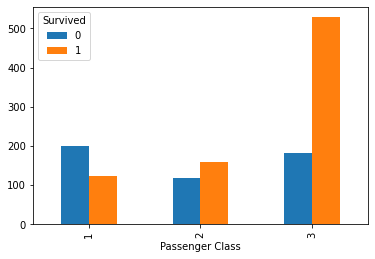

In [153]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

# Homework

# EX 1 : Pandas
Please load this Clinic data from https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv and perform preprocessing as follows :
1. Set index of data to hn numbers
2. Remove missing values
3. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo
4. Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)
5. Separate data into groups based on pmmet values
6. for each group, randomly choose 10 data

In [154]:
data = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',')

In [155]:
data

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Set Hn to index

In [156]:
data_backup = data
data_backup = data_backup.set_index('hn')
data_backup

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Remove missing values

In [157]:
data_backup.isnull().any()
#เช็คว่าคอลัมน์ไหนเป็นค่าว่างบ้าง

age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [158]:
data_backup = data_backup.dropna(0,'any')
#ดรอปแถวที่ว่าง

In [159]:
data_backup.isnull().any()
#เช็คว่ายังมีค่าว่างอยู่ในคอลัมน์เหล่านี้อีกไหม

age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

# 3. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo

In [160]:
data_backup = data_backup.drop('hiv',1)
data_backup = data_backup.drop('size',1)
data_backup = data_backup.drop('utmet',1)
data_backup = data_backup.drop('vgmet',1)
data_backup = data_backup.drop('surgery',1)
data_backup = data_backup.drop('pchemo',1)
data_backup.columns


Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

# 4. Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)

In [161]:
df_change_age = data_backup
df_change_age.loc[data_backup['age'] <= 20,'age']  = 'Young'
df_change_age.loc[data_backup['age'] > 20,'age'] = 'Old'
df_change_age

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


# 5. Separate data into groups based on pmmet values

In [162]:
data_backup['pmmet'].unique()

array([0., 1.])

In [163]:
data_pm0 = df_change_age.loc[df_change_age['pmmet'] == 0.0]
data_pm0

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


In [166]:

data_pm1 = df_change_age.loc[df_change_age['pmmet'] == 1.0]
data_pm1

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


# 5.1 Using pandas groupby

In [164]:
data_pmmet = data_backup.groupby('pmmet')
data_pmmet.describe()

parity                                               menopaus            \
       count      mean       std  min  25%  50%  75%   max    count      mean   
pmmet                                                                           
0.0    803.0  2.066002  1.259132  0.0  1.0  2.0  2.0  13.0    803.0  0.301370   
1.0    232.0  2.073276  1.233996  0.0  1.0  2.0  2.0   8.0    232.0  0.362069   

       ... pelvicme      adnmet                                               
       ...      75%  max  count      mean       std  min  25%  50%  75%  max  
pmmet  ...                                                                    
0.0    ...      0.0  3.0  803.0  0.463263  0.839833  0.0  0.0  0.0  0.0  2.0  
1.0    ...      1.0  1.0  232.0  0.331897  0.725073  0.0  0.0  0.0  0.0  2.0  

[2 rows x 120 columns]

# 6. for each group, randomly choose 10 data

In [168]:
pm0_random = data_pm0.sample(10)
pm1_random = data_pm1.sample(10)

In [169]:
pm0_random

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2639488,Old,1,0.0,0,0.0,5.0,1.0,5.0,4.5,1.0,28.0,7.0,3.0,1.0,0.0,0.0,0.0
2807607,Old,1,0.0,0,0.0,2.0,2.0,4.0,2.0,2.0,24.0,2.0,2.0,0.0,0.0,0.0,2.0
3169688,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,42.0,5.0,2.0,0.0,0.0,0.0,2.0
3511560,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,38.0,0.0,1.0,1.0,0.0,0.0,0.0
3444616,Old,3,1.0,1,0.0,3.0,2.0,4.0,2.0,1.0,31.0,2.0,3.0,0.0,0.0,0.0,0.0
3614593,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,2.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
3810781,Old,1,1.0,0,0.0,3.0,1.0,6.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3388923,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,30.0,999.0,3.0,0.0,0.0,0.0,0.0
2994088,Old,3,0.0,1,0.0,4.5,1.0,5.0,4.0,4.0,32.0,999.0,3.0,0.0,0.0,0.0,0.0


In [170]:
pm1_random

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3356954,Old,2,0.0,0,0.0,3.0,2.0,4.0,4.0,1.0,40.0,7.0,3.0,0.0,0.0,1.0,0.0
3208407,Old,2,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,55.0,999.0,3.0,0.0,0.0,1.0,0.0
3258942,Old,3,0.0,0,0.0,3.5,1.0,4.0,4.0,1.0,31.0,999.0,3.0,0.0,1.0,1.0,2.0
3363841,Old,1,0.0,1,0.0,4.5,1.0,5.0,4.0,4.0,24.0,999.0,3.0,0.0,1.0,1.0,0.0
3224042,Old,2,0.0,0,0.0,5.0,1.0,6.0,5.0,1.0,19.0,999.0,3.0,2.0,1.0,1.0,0.0
3208403,Old,2,1.0,0,0.0,4.5,1.0,6.0,4.0,1.0,46.0,5.0,3.0,1.0,1.0,1.0,0.0
3005921,Old,2,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,23.0,35.0,3.0,0.0,1.0,1.0,0.0
3396778,Old,2,1.0,1,0.0,1.0,2.0,4.0,1.5,1.0,41.0,999.0,3.0,0.0,0.0,1.0,0.0
3784437,Old,2,1.0,1,0.0,2.0,2.0,4.0,2.5,1.0,23.0,999.0,3.0,0.0,0.0,1.0,0.0


In [171]:
data_backup.sample(10)



,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3383912,Old,3,0.0,0,0.0,2.5,2.0,6.0,2.0,2.0,16.0,3.0,3.0,0.0,1.0,0.0,2.0
2998213,Old,2,0.0,0,0.0,5.0,2.0,5.0,5.0,2.0,22.0,5.0,3.0,0.0,0.0,0.0,0.0
3235798,Old,2,1.0,0,0.0,1.0,1.0,4.0,2.0,1.0,19.0,1.0,3.0,0.0,1.0,0.0,0.0
3518572,Old,2,0.0,0,1.0,3.0,1.0,6.0,3.0,1.0,30.0,2.0,3.0,0.0,1.0,1.0,0.0
3442060,Old,2,0.0,0,0.0,3.0,1.0,6.0,3.0,1.0,20.0,0.0,3.0,0.0,0.0,0.0,0.0
3537970,Old,2,1.0,0,0.0,0.5,3.0,4.0,2.0,2.0,29.0,0.0,1.0,0.0,0.0,0.0,0.0
2775753,Old,2,0.0,1,0.0,0.0,5.0,4.0,0.0,2.0,36.0,999.0,3.0,0.0,1.0,1.0,2.0
2748447,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,28.0,4.0,3.0,0.0,0.0,0.0,0.0
2785933,Old,4,0.0,0,0.0,5.0,1.0,6.0,3.0,1.0,22.0,0.0,3.0,0.0,0.0,0.0,0.0


# Ex. 2 Please explore this dataset and report at least 5 facts about this dataset

In [172]:
import matplotlib.pyplot as plt


In [173]:

data_backup.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

# 2.1 Bar graph showing the relationship between age and disease

<AxesSubplot:xlabel='age'>

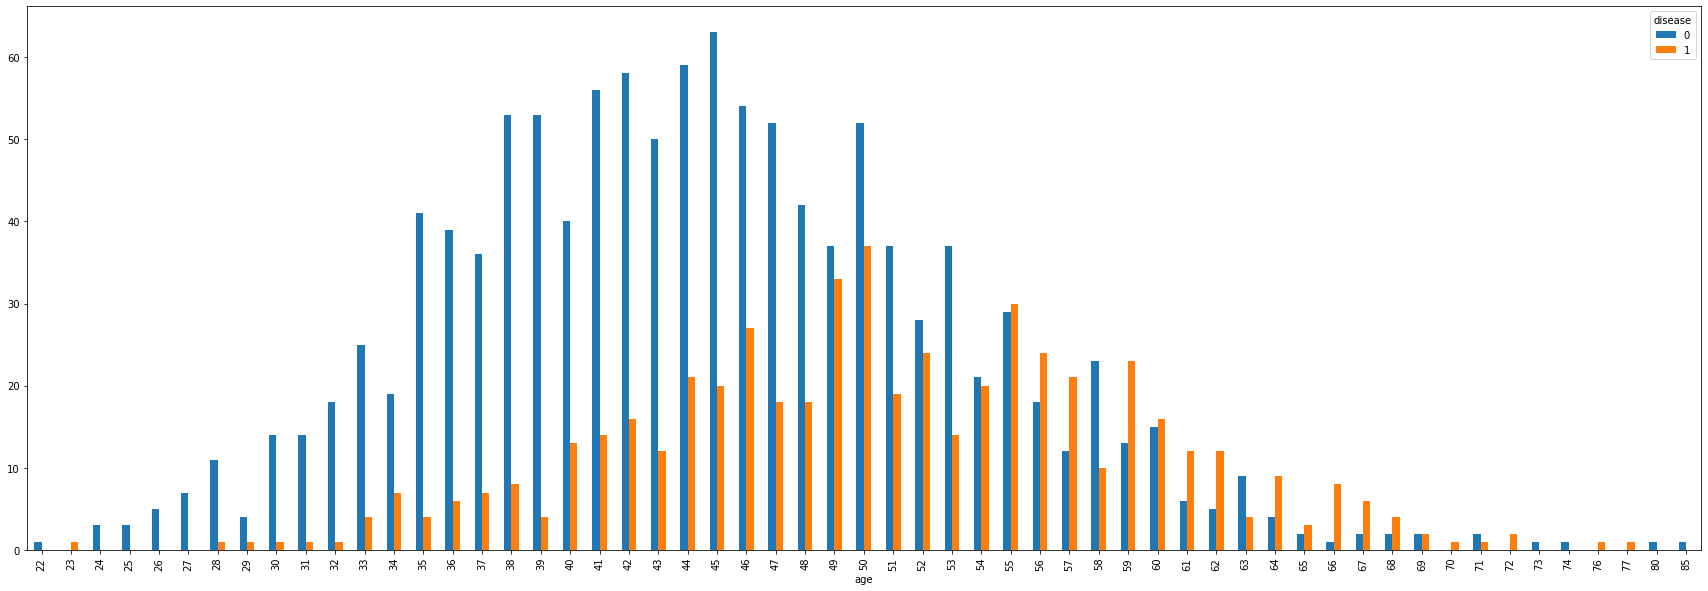

In [188]:
pd.crosstab(data['age'],data['disease']).plot(kind='bar',figsize=(30,10))

# 2.2 Graph showing the number of people in different age range that catch a disease.

<AxesSubplot:xlabel='age'>

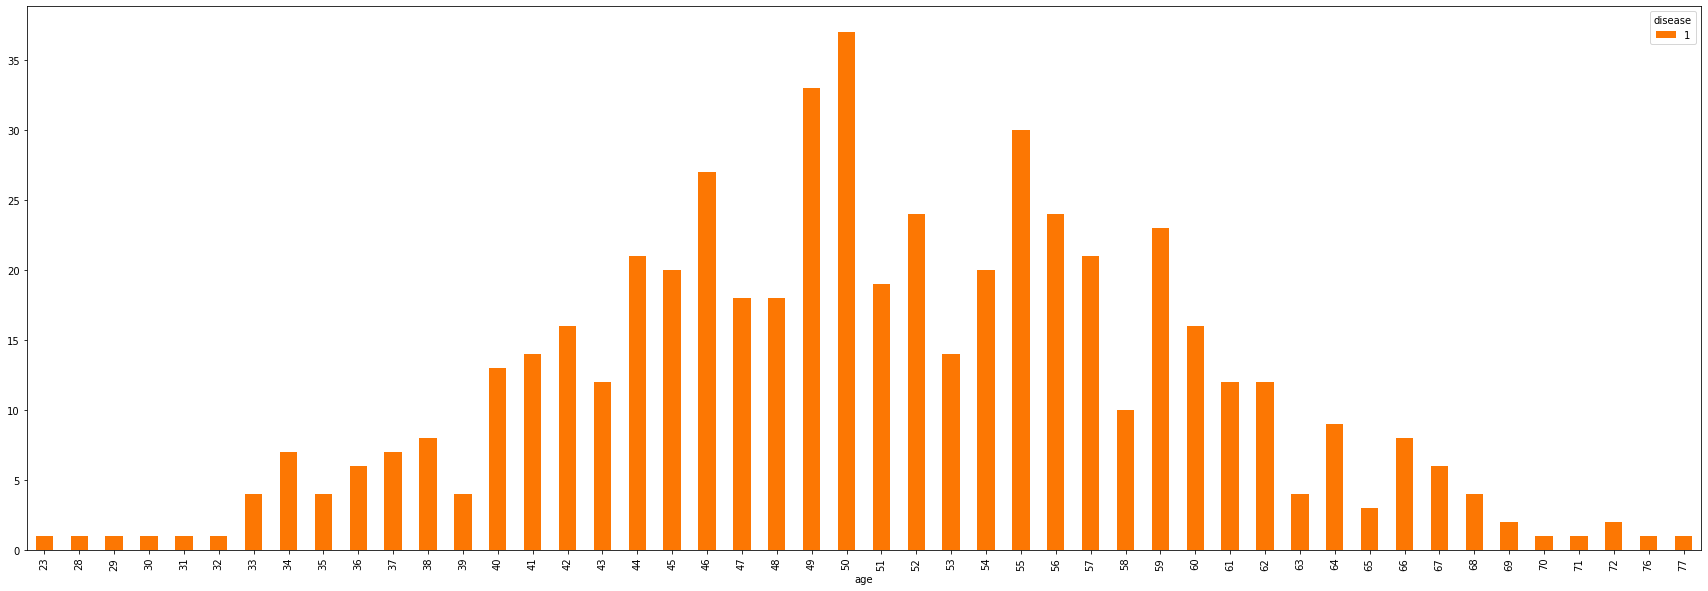

In [202]:
data1 = data[data['disease']== 1]
pd.crosstab(data1['age'], data1['disease']).plot(kind='bar',figsize=(30,10), color= '#fc7703')

# 2.3 Graph showing the number of people in different age range that did not catch a disease.

<AxesSubplot:xlabel='age'>

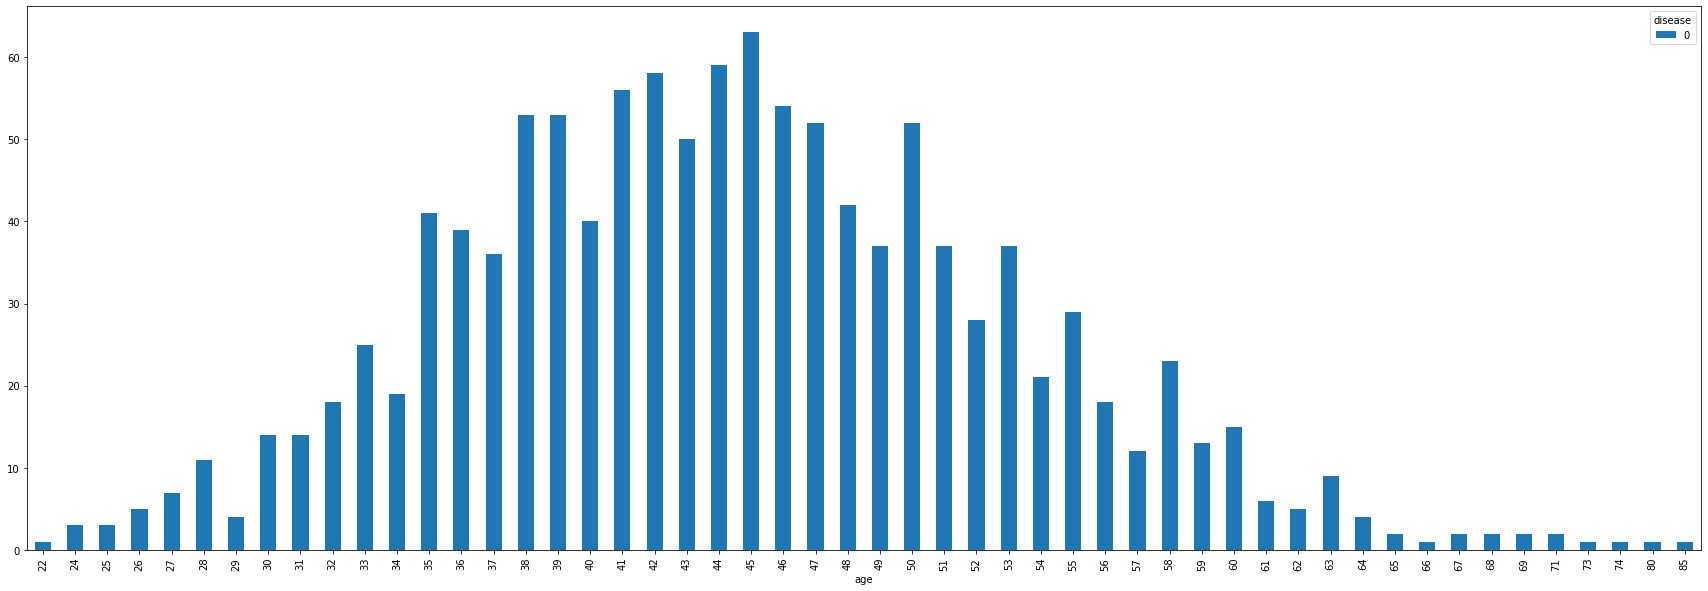

In [203]:
data1 = data[data['disease']== 0]
pd.crosstab(data1['age'], data1['disease']).plot(kind='bar',figsize=(30,10))

# 2.4 A bar graph showing the relationship between disease and OPD size

<AxesSubplot:xlabel='disease'>

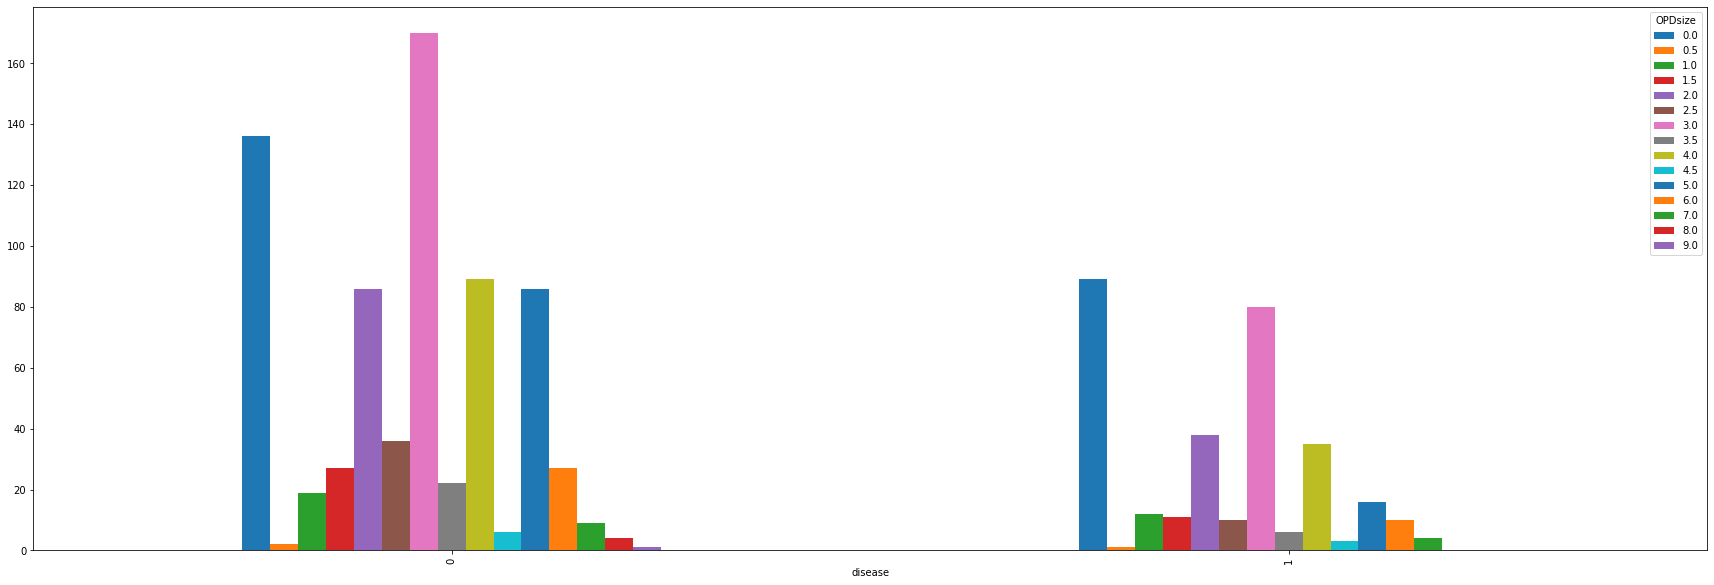

In [247]:
pd.crosstab(data_backup['disease'],data_backup['OPDsize']).plot(kind='bar',figsize=(30,10))

# 2.5 A bar chart showing the relationship between stage and ward size.

<AxesSubplot:xlabel='stage'>

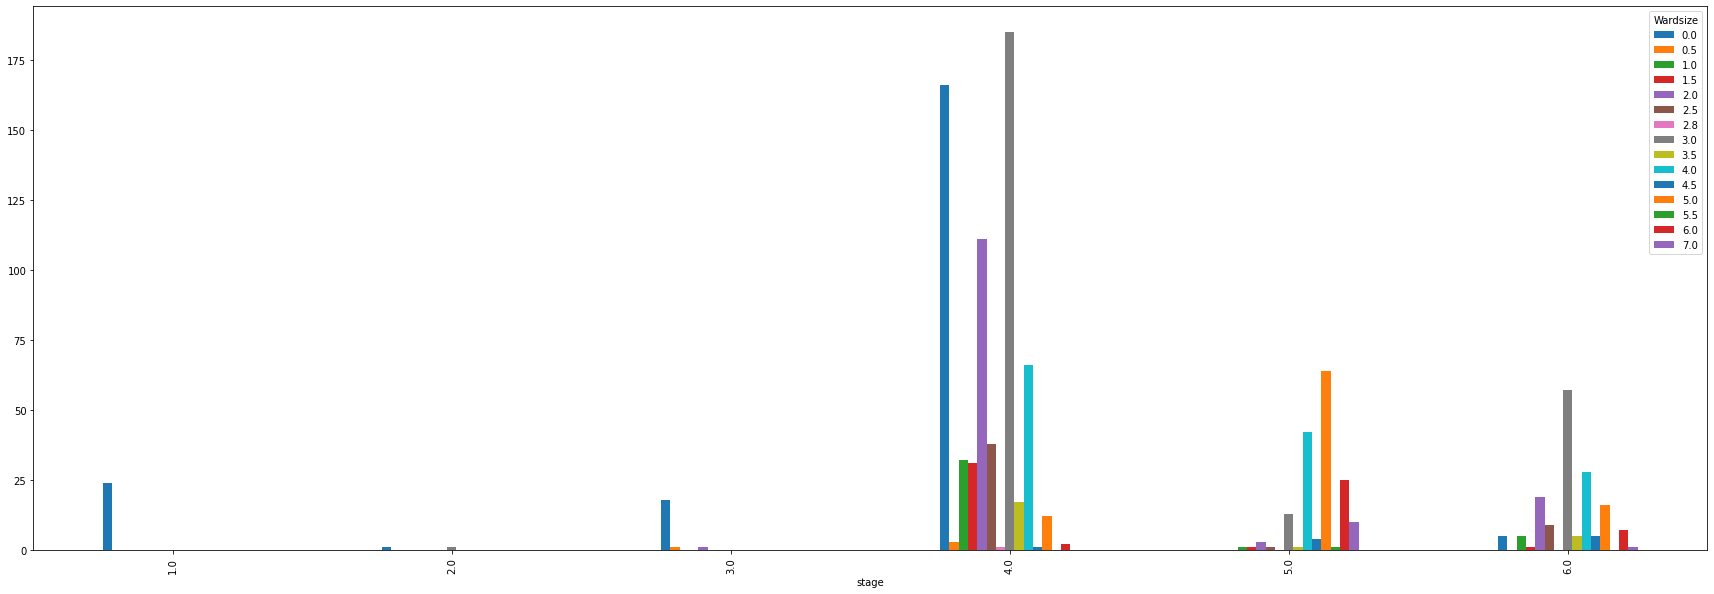

In [250]:
pd.crosstab(data_backup['stage'], data_backup['Wardsize']).plot(kind='bar',figsize = (30,10))

# 3. COVID-19 Situation in Chiang Mai on 2nd August 2564
---------------------------------------------------------
คลัสเตอร์ฟาร์มไก่ 
https://cm108.com/w/56901/?fbclid=IwAR0nqieQhQxY54SFxuqBu5nfRal7GzRWTtFdT2RrDx5jJGAbgr2Czp8PonM

In [2]:
import numpy as np
import folium
!pip install geocoder
import geocoder
import pandas as pd

     |████████████████████████████████| 98 kB 776 kB/s eta 0:00:01


In [5]:
name = pd.DataFrame({"name":['หางดง', 'ดอนจั่น', 'พร้าว','สันทราย','สันป่าตอง','แม่วาง'],
                     "value":[156, 21, 8, 13, 14, 14]}, dtype=str)
l =[]
for i in range(0,len(name)):
    location = name.iloc[i]['name']
    loc = geocoder.osm(location)
    radius = name.iloc[i]['value']
    latlng = [loc.lat, loc.lng, location, radius]
    l.append(latlng)
location_latlng = pd.DataFrame(l, columns=["latitude", "longitude","name", "radius"])
location_latlng

,latitude,longitude,name,radius
0,18.685687,98.919222,หางดง,156
1,18.749009,99.060305,ดอนจั่น,21
2,19.368634,99.204262,พร้าว,8
3,18.636309,98.963105,สันทราย,13
4,18.624430,98.895356,สันป่าตอง,14
5,18.599203,98.819252,แม่วาง,14


In [6]:
covid_map = folium.Map(location=[18.7883, 98.9853], tiles="OpenStreetMap", zoom_start=11)
for i in range(0,len(location_latlng)):
    folium.CircleMarker(
        location=[location_latlng.iloc[i]['latitude'], location_latlng.iloc[i]['longitude']],
        radius = [location_latlng.iloc[i]['radius']],
        color = '#FE0000',
        fill = True,
        fill_color = '#E3242B',    
   ).add_to(covid_map)
covid_map